In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt

Loading the data

In [3]:
data_url = "https://raw.githubusercontent.com/AnjulaMehto/Sampling_Assignment/main/Creditcard_data.csv"
data = pd.read_csv(data_url)

Separate features and target

In [4]:
X = data.drop('Class', axis=1)
y = data['Class']

Balance the dataset using SMOTE and Combine balanced dataset

In [5]:
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)
balanced_data = pd.concat([pd.DataFrame(X_balanced), pd.DataFrame(y_balanced, columns=['Class'])], axis=1)


Sampling methods

In [6]:
def simple_random_sampling(df):
    return df.sample(frac=1, random_state=42)

def stratified_sampling(df):
    return df.groupby('Class', group_keys=False).apply(lambda x: x.sample(frac=0.8, random_state=42))

def systematic_sampling(df):
    return df.iloc[::5, :]

def cluster_sampling(df):
    return df.sample(frac=0.5, random_state=42)

def reservoir_sampling(df, sample_size):
    return df.sample(n=sample_size, random_state=42)


Calculate sample size for reservoir sampling

In [7]:
z = 1.96
p = 0.5
e = 0.05
n = int((z**2 * p * (1 - p)) / (e**2))

In [8]:
sampling_methods = [
    simple_random_sampling,
    stratified_sampling,
    systematic_sampling,
    cluster_sampling,
    lambda df: reservoir_sampling(df, sample_size=n)
]

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

Evaluate models with different sampling techniques

In [9]:
results = []

for i, sampling_method in enumerate(sampling_methods, start=1):
    sample = sampling_method(balanced_data)
    X_sample = sample.drop('Class', axis=1)
    y_sample = sample['Class']

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for model_name, model in models.items():
        cv_scores = cross_val_score(model, X_sample, y_sample, cv=skf, scoring='accuracy')
        accuracy_score = np.mean(cv_scores)
        results.append({
            "Sampling Technique": f"Sampling{i}",
            "Model": model_name,
            "Accuracy Score": accuracy_score
        })

results_df = pd.DataFrame(results)
results_df.to_csv("sampling_results_accuracy.csv", index=False)

results_pivot = results_df.pivot(index="Model", columns="Sampling Technique", values="Accuracy Score")

print("Accuracy Score Results Table:")
print(results_pivot)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy Score Results Table:
Sampling Technique   Sampling1  Sampling2  Sampling3  Sampling4  Sampling5
Model                                                                     
Decision Tree         0.983609   0.982787   0.951084   0.971164   0.939986
K-Nearest Neighbors   0.851902   0.845902   0.702591   0.803414   0.768319
Logistic Regression   0.927267   0.922951   0.878953   0.905667   0.862098
Naive Bayes           0.855168   0.836885   0.836330   0.876832   0.867327
Random Forest         0.996723   0.995902   0.990164   0.996061   0.984416


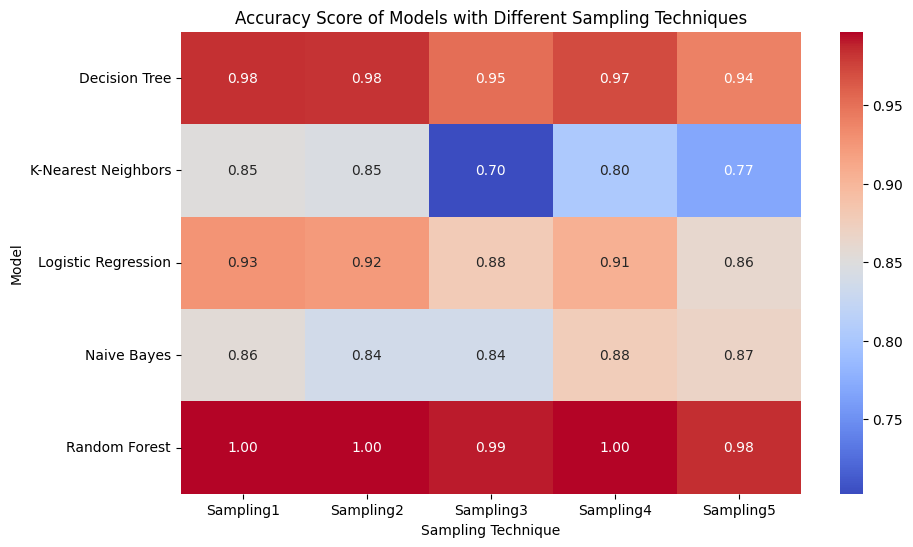

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(results_pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Accuracy Score of Models with Different Sampling Techniques")
plt.ylabel("Model")
plt.xlabel("Sampling Technique")
plt.show()
